In [1]:
import numpy as np
import pandas as pd
import time 
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder

E:\Anaconda2\envs\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

#https://github.com/mwaskom/seaborn/issues/1009

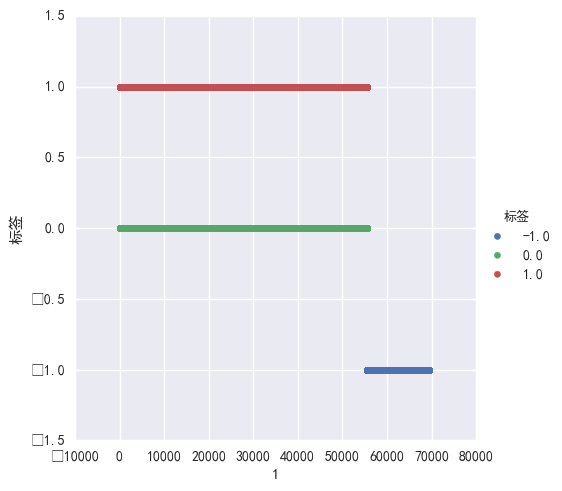

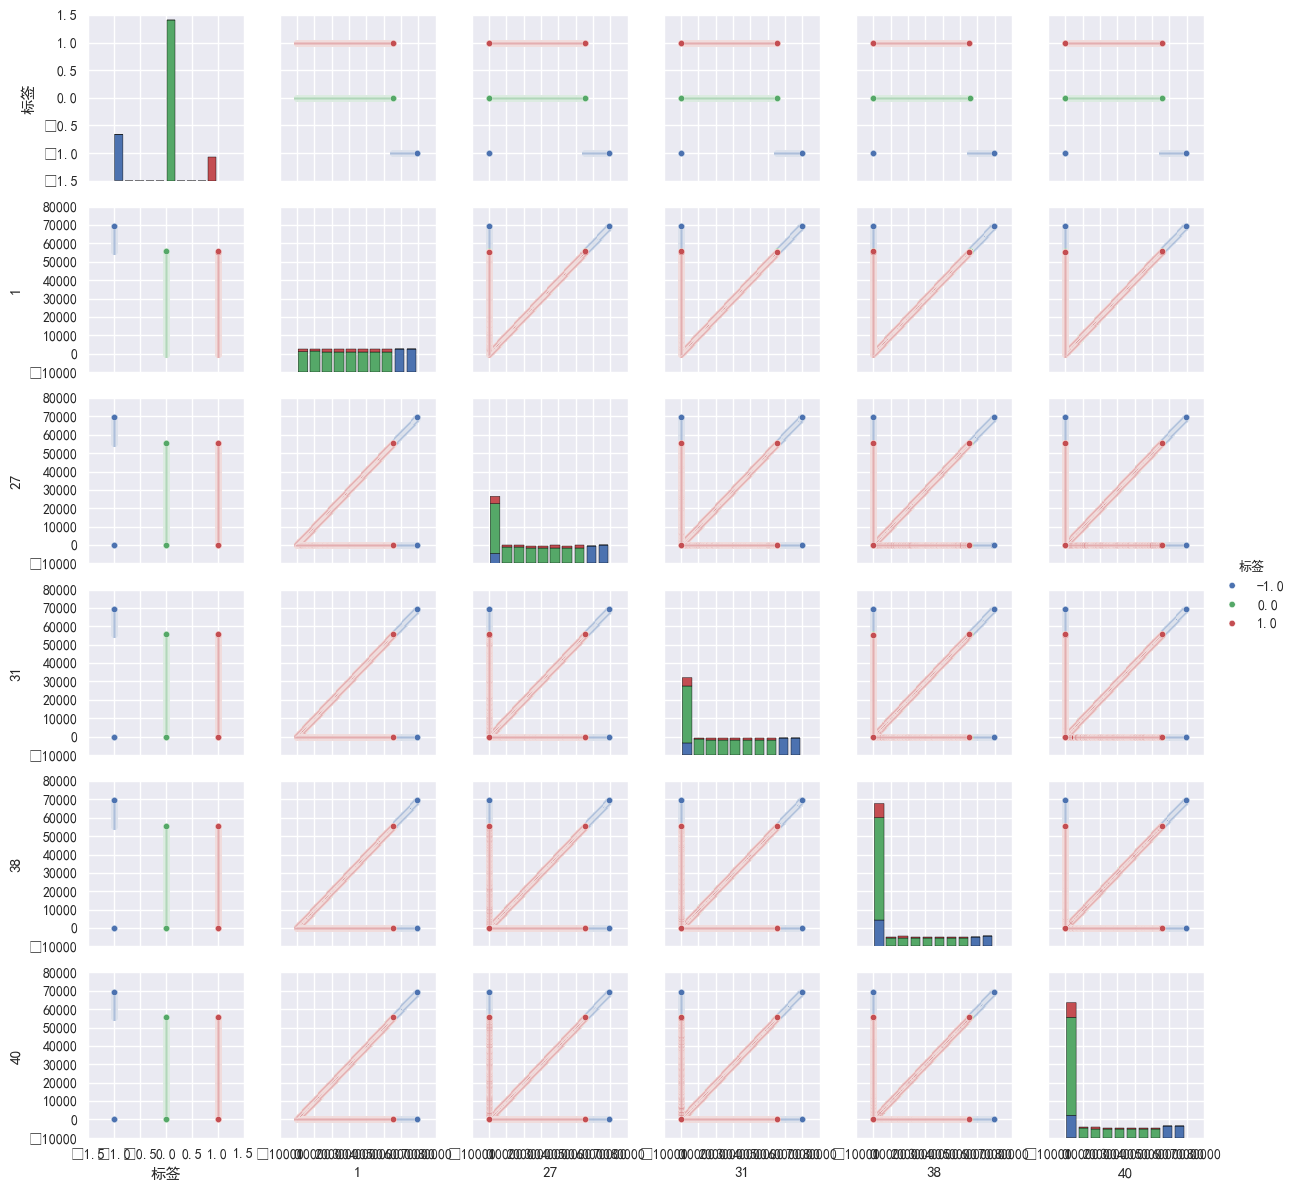

In [132]:
sns.FacetGrid(dataset, hue="标签", size=5).map(plt.scatter, 1, "标签").add_legend()
xxx=dataset[['标签',1,27,31,38,40]]
sns.pairplot(xxx, hue="标签", size=2)

**读入数据:**

In [2]:
#a1 = OneHotEncoder(sparse = False).fit_transform( trains[['用户性别']] )
#a2 = OneHotEncoder(sparse = False).fit_transform( trains[['用户职业']])
#a3 = OneHotEncoder(sparse = False).fit_transform( trains[['用户教育程度']])
#a4 = OneHotEncoder(sparse = False).fit_transform( trains[['用户婚姻状态']])
#a5 = OneHotEncoder(sparse = False).fit_transform( trains[['用户户口类型']])
#final_output = np.hstack((a1,a2,a3,a4,a5))
#final_output

#pandas 自带的get_dummies函数实现one-hot,并构造组合特征
# trains = pd.read_csv("../feature/训练表_20170119_A.csv",encoding="gb2312") # 注意自己数据路径
# #trains.index = trains['用户标识'].tolist()
# train_label=trains[['用户标识','标签']]
# trains=pd.get_dummies(trains,columns=trains[['用户性别','用户职业','用户教育程度','用户婚姻状态','用户户口类型']]).drop(['标签'],axis=1)

# tests = pd.read_csv("../feature/测试表_20170119_A.csv",encoding="gb2312") # 注意自己数据路径
# #tests.index = tests['用户标识'].tolist()
# test_label=tests[['用户标识','标签']]
# tests=pd.get_dummies(tests,columns=tests[['用户性别','用户职业','用户教育程度','用户婚姻状态','用户户口类型']]).drop(['标签'],axis=1)

# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(interaction_only=True)
# trains=poly.fit_transform(trains)
# df = pd.DataFrame(trains.reshape(55596, 326))
# df.interpolate(axis=1).values.reshape(trains.shape)
# df['用户标识']=df[1].astype(int)
# trains=pd.merge(train_label,df,how='inner', on = "用户标识")

# tests=poly.fit_transform(tests)
# df = pd.DataFrame(tests.reshape(13899, 326))
# df.interpolate(axis=1).values.reshape(tests.shape)
# df['用户标识']=df[1].astype(int)
# tests=pd.merge(test_label,df,how='inner', on = "用户标识")

In [6]:
dataset.shape

(69495, 2325)

# 用户信息表：  
69495 rows × 303 columns

In [3]:
train = pd.read_csv("../feature/训练表_20170119_A.csv",encoding="gb2312") # 注意自己数据路径
test = pd.read_csv("../feature/测试表_20170119_A.csv",encoding="gb2312") # 注意自己数据路径
test=test.fillna(-1)

dataset= pd.concat([train,test],axis=0).reset_index()
label=dataset[['用户标识','标签']]
dataset=dataset.drop(['index','用户标识'],axis=1)

dataset=pd.get_dummies(dataset,columns=dataset[['用户性别','用户职业','用户教育程度','用户婚姻状态','用户户口类型']]).drop(['标签'],axis=1)
#dataset #69495 rows × 24 columns
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,interaction_only=True)#之前設置的是2，现在改成3，更多的交互特征
dataset=poly.fit_transform(dataset)
df = pd.DataFrame(dataset.reshape(69495,2325))
df.interpolate(axis=1).values.reshape(dataset.shape)

#dataset
#trains=pd.merge(label,df,left_index=True,right_index=True,how='outer')
trains=pd.concat([label,df],axis=1)
trains#69495 rows × 303 columns

,用户标识,标签,0,1,2,3,4,5,6,7,...,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324
0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 用户浏览行为训练表：  
69495 rows × 343 columns

In [177]:
train = pd.read_csv("../feature/用户浏览行为测试表_20170119_A.csv",encoding="gb2312") # 注意自己数据路径
test = pd.read_csv("../feature/用户浏览行为训练表_20170119_A.csv",encoding="gb2312") # 注意自己数据路径
dataset= pd.concat([train,test],axis=0)
temp=dataset[:]
#统计行和列的缺失值数
dataset=dataset.fillna(-1)
temp['用户浏览行为缺失统计']=(dataset==-1).sum(axis=1)
#用均值填充缺失值
temp.fillna(temp.mean(),inplace=True)
trains=pd.merge(trains,temp,how='left', on = "用户标识")
trains#69495 rows × 343columns

,用户标识,标签,0,1,2,3,4,5,6,7,...,放款后浏览子行为编号_3,放款后浏览子行为编号_4,放款后浏览子行为编号_5,放款后浏览子行为编号_6,放款后浏览子行为编号_7,放款后浏览子行为编号_8,放款后浏览子行为编号_9,放款后浏览子行为编号_10,放款后浏览子行为编号_11,用户浏览行为缺失统计
0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.718407,70.073693,40.287381,36.067905,48.294558,15.810158,0.258406,32.14646,0.023401,38
1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,90.000000,150.000000,105.000000,135.000000,105.000000,105.000000,0.000000,75.00000,0.000000,8
2,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,48.000000,30.000000,24.000000,42.000000,0.000000,0.000000,24.00000,0.000000,8
3,4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.000000,64.000000,36.000000,32.000000,36.000000,4.000000,0.000000,24.00000,0.000000,8
4,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.718407,70.073693,40.287381,36.067905,48.294558,15.810158,0.258406,32.14646,0.023401,38
5,6,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.00000,0.000000,8
6,7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,140.000000,98.000000,98.000000,112.000000,14.000000,0.000000,84.00000,0.000000,8
7,8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,22.000000,154.000000,66.000000,99.000000,132.000000,11.000000,0.000000,132.00000,0.000000,8
8,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3.718407,70.073693,40.287381,36.067905,48.294558,15.810158,0.258406,32.14646,0.023401,38
9,10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,20.000000,40.000000,20.000000,20.000000,30.000000,40.000000,0.000000,20.00000,0.000000,8


# 用户银行流水记录表：  
69495 rows × 369  columns

In [179]:
train = pd.read_csv("../feature/用户银行流水记录训练表_20170119_A.csv",encoding="gb2312") # 注意自己数据路径
test = pd.read_csv("../feature/用户银行流水记录测试表_20170119_A.csv",encoding="gb2312") # 注意自己数据路径
dataset= pd.concat([train,test],axis=0)
temp=dataset[:]
#统计行和列的缺失值数
dataset=dataset.fillna(-1)
temp['用户银行流水记录缺失统计']=(dataset==-1).sum(axis=1)
#用均值填充缺失值
temp.fillna(temp.mean(),inplace=True)
temp
trains=pd.merge(trains,temp,how='left', on = "用户标识")
trains#69495 rows × 369  columns

,用户标识,标签,0,1,2,3,4,5,6,7,...,放款后用户支出总计,放款后用户工资收入笔数,放款后用户工资收入总计,放款后用户收入支出笔数差值,放款后用户收入支出总计差值,放款后用户非工资收入笔数,放款后用户非工资收入总计,放款后工资收入笔数乘以差值,放款后工资收入总计乘以差值,用户银行流水记录缺失统计
0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1358.128024,4.851931,64.717081,-71.873742,-776.353235,68.791845,891.918534,-821.802575,-118239.074919,18
1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1358.128024,4.851931,64.717081,-71.873742,-776.353235,68.791845,891.918534,-821.802575,-118239.074919,24
2,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1358.128024,4.851931,64.717081,-71.873742,-776.353235,68.791845,891.918534,-821.802575,-118239.074919,18
3,4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1358.128024,4.851931,64.717081,-71.873742,-776.353235,68.791845,891.918534,-821.802575,-118239.074919,18
4,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1358.128024,4.851931,64.717081,-71.873742,-776.353235,68.791845,891.918534,-821.802575,-118239.074919,24
5,6,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1358.128024,4.851931,64.717081,-71.873742,-776.353235,68.791845,891.918534,-821.802575,-118239.074919,24
6,7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1358.128024,4.851931,64.717081,-71.873742,-776.353235,68.791845,891.918534,-821.802575,-118239.074919,24
7,8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1358.128024,4.851931,64.717081,-71.873742,-776.353235,68.791845,891.918534,-821.802575,-118239.074919,24
8,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1358.128024,4.851931,64.717081,-71.873742,-776.353235,68.791845,891.918534,-821.802575,-118239.074919,18
9,10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,981.631241,4.851931,64.717081,-7.000000,-83.078408,68.791845,891.918534,-821.802575,-118239.074919,12


# 用户账单表初级特征:  
69495 rows × 448  columns

In [180]:
train = pd.read_csv("../feature/用户账单表初级特征训练表_20170119_A.csv",encoding="gb2312") # 注意自己数据路径
test = pd.read_csv("../feature/用户账单表初级特征测试表_20170119_A.csv",encoding="gb2312") # 注意自己数据路径
dataset= pd.concat([train,test],axis=0)
temp=dataset[:]
print(temp.shape)
#统计行和列的缺失值数
dataset=dataset.fillna(-1)
temp['用户银行流水记录缺失统计']=(dataset==-1).sum(axis=1)
#特征轮：构造放款后与放款前差值特征
feature_name=temp.columns 
for name in feature_name:
    if name.find('款后')> 0:
        x1=name.replace('款后','款前')
        if x1 in feature_name:
            temp[name+"与"+x1+"差值"]=temp[name]-temp[x1]        
#用均值填充缺失值
temp.fillna(temp.mean(),inplace=True)
#temp

trains=pd.merge(trains,temp,how='left', on = "用户标识")
trains#69495 rows × 448  columns

(69495, 57)


,用户标识,标签,0,1,2,3,4,5,6,7,...,用户放款后消费笔数(去重)与用户放款前消费笔数(去重)差值,用户放款后循环利息(去重)与用户放款前循环利息(去重)差值,放款后账单大于还款计数(去重)与放款前账单大于还款计数(去重)差值,放款后账单等于还款计数(去重)与放款前账单等于还款计数(去重)差值,放款后账单小于还款计数(去重)与放款前账单小于还款计数(去重)差值,放款后账单汇总还款差额(去重)与放款前账单汇总还款差额(去重)差值,放款后账单最大值还款差额(去重)与放款前账单最大值还款差额(去重)差值,用户放款后消费笔数与用户放款前消费笔数差值,用户放款后循环利息与用户放款前循环利息差值,用户放款后信用卡额度最大值与用户放款前信用卡额度最大值差值
0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-20.255175,-44.043940,-13.131131,-5.082319,-10.447574,-26.775696,-14.651808,-36.130726,-82.248417,-0.103084
1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,11.000000,0.000000,1.000000,-5.082319,3.000000,6.638937,6.638937,11.000000,0.000000,1.609437
2,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-20.255175,-44.043940,-13.131131,-5.082319,-10.447574,-26.775696,-14.651808,-36.130726,-82.248417,-0.103084
3,4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,-5.082319,-10.447574,1.181840,1.181840,0.000000,0.000000,-0.154151
4,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-20.255175,-44.043940,-13.131131,-5.082319,-10.447574,-26.775696,-14.651808,-36.130726,-82.248417,-0.103084
5,6,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-20.255175,-44.043940,-13.131131,-5.082319,-10.447574,-26.775696,-14.651808,-36.130726,-82.248417,-0.103084
6,7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-35.000000,0.000000,-13.131131,-5.082319,0.000000,71.735393,15.957393,-200.000000,0.000000,-0.287682
7,8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-20.255175,-44.043940,-13.131131,-5.082319,-10.447574,-26.775696,-14.651808,-36.130726,-82.248417,-0.103084
8,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-20.255175,-44.043940,-13.131131,-5.082319,-10.447574,-26.775696,-14.651808,-36.130726,-82.248417,-0.103084
9,10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-41.000000,0.000000,-9.000000,-5.082319,-15.000000,-6.357178,2.182406,-90.000000,0.000000,0.693147


# 用户账单表特征:  
69495 rows × 1146 columns


In [181]:
train = pd.read_csv("../feature/用户账单表特征训练表20170119_A.csv",encoding="gb2312") # 注意自己数据路径
test = pd.read_csv("../feature/用户账单表特征测试表20170119_A.csv",encoding="gb2312") # 注意自己数据路径
dataset= pd.concat([train,test],axis=0)
temp=dataset[:]
print(temp.shape)#(69495, 466)
#统计行和列的缺失值数
dataset=dataset.fillna(-1)
temp['用户银行流水记录缺失统计']=(dataset==-1).sum(axis=1)
#特征轮：构造放款后与放款前差值特征
feature_name=temp.columns 
for name in feature_name:
    if name.find('款后')> 0:
        x1=name.replace('款后','款前')
        if x1 in feature_name:
            temp[name+"与"+x1+"差值"]=temp[name]-temp[x1]        
#用均值填充缺失值
temp.fillna(temp.mean(),inplace=True)
temp#69495 rows × 699 columns

trains=pd.merge(trains,temp,how='left', on = "用户标识")
trains#69495 rows × 1146 columns

(69495, 466)


,用户标识,标签,0,1,2,3,4,5,6,7,...,去重后放款后消费笔数var与去重后放款前消费笔数var差值,去重后放款后本期账单金额var与去重后放款前本期账单金额var差值,去重后放款后调整金额var与去重后放款前调整金额var差值,去重后放款后循环利息var与去重后放款前循环利息var差值,去重后放款后可用余额var与去重后放款前可用余额var差值,去重后放款后预借现金额度var与去重后放款前预借现金额度var差值,去重后放款后上期还款金额var与放款后上期账单金额var差值与去重后放款前上期还款金额var与放款前上期账单金额var差值差值,去重后放款后信用卡额度var与放款后本期账单余额var差值与去重后放款前信用卡额度var与放款前本期账单余额var差值差值,去重后放款后可用余额var与放款后预借现金额度var差值与去重后放款前可用余额var与放款前预借现金额度var差值差值,去重后放款后本期账单最低还款额var与放款后循环利息var之和与去重后放款前本期账单最低还款额var与放款前循环利息var之和差值
0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.975484,13.856902,2.314454,4.602978,-2.796642,15.228800,4.399710,12.493712,-18.025442,-1.663579
1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-1.119658,12.825337,0.000000,0.000000,0.000000,70.266540,-2.237091,-68.591951,-70.266540,-113.517191
2,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.975484,13.856902,2.314454,4.602978,-2.796642,15.228800,4.399710,12.493712,-18.025442,-1.663579
3,4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.200000,-6.149673,0.000000,0.000000,-31.789011,-3.275160,-12.924828,26.717870,-28.513851,-0.454825
4,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.975484,13.856902,2.314454,4.602978,-2.796642,15.228800,4.399710,12.493712,-18.025442,-1.663579
5,6,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.975484,13.856902,2.314454,4.602978,-2.796642,15.228800,4.399710,12.493712,-18.025442,-1.663579
6,7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-8.628151,7.711654,0.000000,0.000000,10.795729,1.814566,262.768115,314.696835,8.981163,-75.921730
7,8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.975484,13.856902,2.314454,4.602978,-2.796642,15.228800,4.399710,12.493712,-18.025442,-1.663579
8,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.975484,13.856902,2.314454,4.602978,-2.796642,15.228800,4.399710,12.493712,-18.025442,-1.663579
9,10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-1.613749,-38.092504,0.000000,0.000000,-15.281851,11.574647,-17.033798,-19.116719,-26.856498,-130.122182


In [182]:
#trains.to_csv("../feature/特征汇总_20170119_A.csv",index=None,encoding="gb2312") #mean填充 69495 rows × 1171 columns 没有删去用户标识
#trains.to_csv("../feature/特征汇总_20170119_B.csv",index=None,encoding="gb2312") #0填充  69495 rows × 1171 columns 没有删去用户标识

#trains.to_csv("../feature/特征汇总_20170119_D.csv",index=None,encoding="gb2312") #0填充 69495 rows × 1146 columns 当前最高分0.43267
#trains.to_csv("../feature/特征汇总_20170119_E.csv",index=None,encoding="gb2312") #mean填充 69495 rows × 1146 columns